<a href="https://colab.research.google.com/github/Nid989/text-similarity/blob/master/syntax_exercises_found_ling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Syntax exercises - Foundations of Linguistics
***

## For the following exercises, you can either make your trees with paper or use some of the Python tools below, e.g. NLTK, Stanford CoreNLP, etc., to label and make your tree. Here is a good online resource: 

https://www.nltk.org/book/ch08.html

https://markgw.github.io/uh-nlp20/week4/

https://www.geeksforgeeks.org/syntax-tree-natural-language-processing/

***

## 1. Make a tree diagram and apply two constituent tests to show that the underlined phrases are constituents. 



#### a. A lady in a blue dress sang the national anthem in the stadium some time after noon. 


#### b. Someone saw a suspicious-looking man with a briefcase walking around in the foyer on Monday half an hour before the building blew up. 


***
## 2. Draw all of the NPs in the following sentences. Use the pronoun test to help you. 


#### a. Someone gave the children presents, but apparently nobody thought that it was not a good idea to give three-year-olds Swiss army knives. 
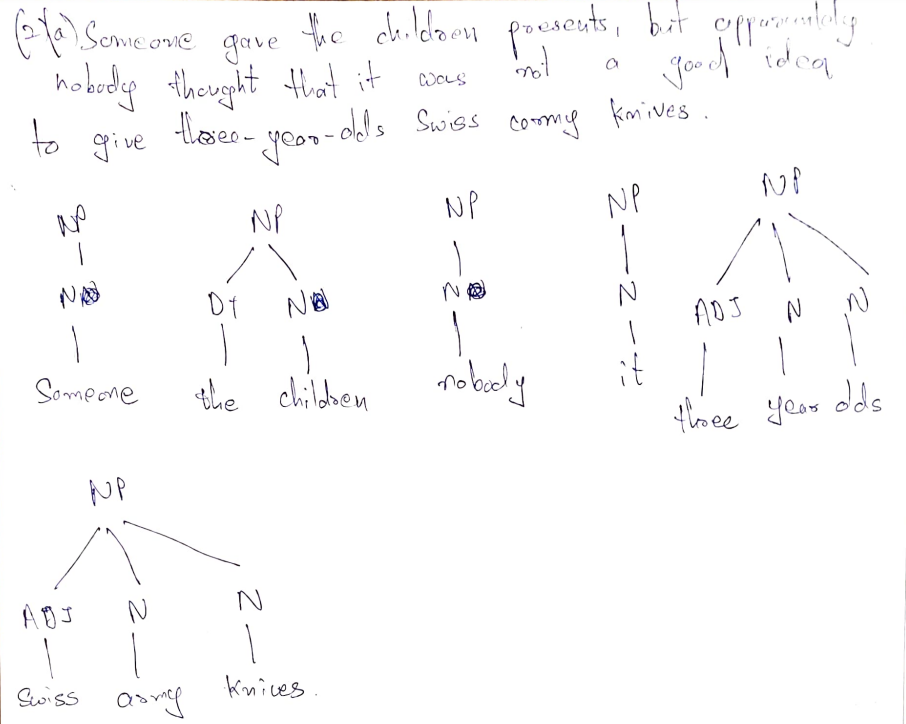

#### b. Three strange men in black suits were seen smoking cigarettes behind the building early in the morning, shortly before a huge explosion blew the roof off the building. 

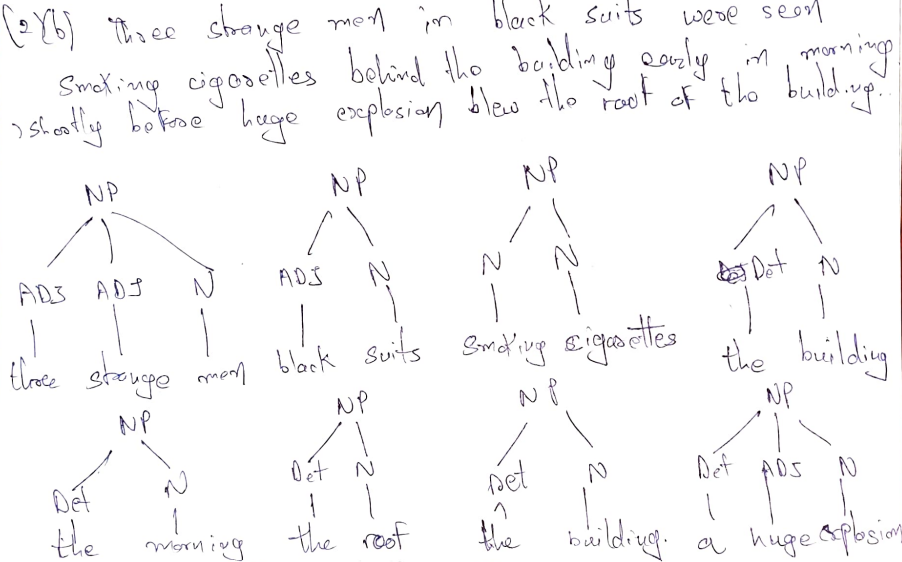

***
## 3. Identify the NP and VP which combine to form the following sentences. 

#### a. The lady over there and her friend know George.

```
NP - (the/DET, lady/N)
NP - (friend/N) + VP - (know/V, George/N)
```



#### b. Fred obviously believes the story about the Martian invasion.

```
VP - (believes/V) + NP - (the/DET, story/N)
NP - (the/DET, Martian/ADJ, invasion/N)
```



#### c. A big problem with the theory still gives the researchers cause for concern. 4. He usually read or watched television

```
NP - (A/determiner, big/ADJ, problem/N)
NP - (the/determiner, theory/N)
VP - (gives/V)
VP - (cause/V)
NP - (concern/N)
VP - (read/V)
VP - (watched/V) + NP - (telivision/N)
```



****
## 4. In this exercise, you are going to examine difficult parsing cases and see where some of the automatic parsing algorithms in standard NLP packages might breakdown. 

#### First download the subset of UPenn treebank

In [34]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [35]:
from nltk.corpus import treebank

In [36]:
print(treebank.sents('wsj_0003.mrg'))

[['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', '*', 'to', 'it', 'more', 'than', '30', 'years', 'ago', ',', 'researchers', 'reported', '0', '*T*-1', '.'], ['The', 'asbestos', 'fiber', ',', 'crocidolite', ',', 'is', 'unusually', 'resilient', 'once', 'it', 'enters', 'the', 'lungs', ',', 'with', 'even', 'brief', 'exposures', 'to', 'it', 'causing', 'symptoms', 'that', '*T*-1', 'show', 'up', 'decades', 'later', ',', 'researchers', 'said', '0', '*T*-2', '.'], ...]


***
### 4a. Draw a tree of the first sentence of wsj_0003.mrg. What are the differences between your parse and what is found annotated UPenn Treebank. 

In [37]:
### print single sentence
print(treebank.words('wsj_0003.mrg'))

['A', 'form', 'of', 'asbestos', 'once', 'used', '*', ...]


In [38]:
### print tags (POS)
print(treebank.tagged_words('wsj_0003.mrg'))

[('A', 'DT'), ('form', 'NN'), ('of', 'IN'), ...]


In [49]:
print(treebank.parsed_sents()[0])

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


1.	There happens to be a lot of categorization of the words in the annotated Penn Treebank compared to the normal syntax parsing.
2.	There are sub-categories of the already present categories, e.g. inn normal syntax parsing we start with the non-terminal 'S' but here we can see 'S-CLR', also other categories like, 'ADVP-TMP', 'NP-SBJ' are not usually included in the normal parsing.
4.	Lastly, we observe a detailed categorization of words.

### 4b. Next, look at the documentation and state what the astericks * mean and how this effects the parse 

1.	astericks * is used to define NONE or NULL element.
3.	Sometime the null elements is co-indexed with integers where this integer servers as a id number for the constituent.
4.	A null element is also used to indicate which lexical NP is to be interpreted as the null subject  of an infinitive complement clause.
5.	Null elements is also used to allow the interpretation of other grammatical structures where constituents do not appear in their default positions. Null elements are used in most cases to make the fronting of any element of an S before the subject . 
6.	In one way they help us keep track of the available constituents 
7.	This affect the parse by defining the null elements and forming a sub category and showing there is no null elements 


### 4c. Last, explain what an RRC here is and how this affected your parse

* RRC – Reduced Relative Clause
* RRC label is used only in cases where there is no Verb Phrase and an extra level is needed for proper attachment of sentential modifiers.

***
# 5. Attachment ambiguities



### 5a. Find the attachtment ambiguity in these sentences

In [12]:
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
sentence1 = 'the cat chased the dog on the rug'.split()
sentence2 = 'the cat chased the dog with the bone on the rug'.split()
sentences = [sentence1, sentence2]

In [13]:
pos_tagged_sentences = [pos_tag(sentence) for sentence in sentences]

In [32]:
pos_tagged_sentences

[[('the', 'DT'),
  ('cat', 'NN'),
  ('chased', 'VBD'),
  ('the', 'DT'),
  ('dog', 'NN'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('rug', 'NN')],
 [('the', 'DT'),
  ('cat', 'NN'),
  ('chased', 'VBD'),
  ('the', 'DT'),
  ('dog', 'NN'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('bone', 'NN'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('rug', 'NN')]]

In [26]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" | "chased"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park" | "rug" | "bone"
  P -> "in" | "on" | "by" | "with"
""")

In [28]:
rd_parser = nltk.RecursiveDescentParser(grammar1) # define parser

In [30]:
# sentence-1
for tree in rd_parser.parse(sentence1):
  print(tree)

(S
  (NP (Det the) (N cat))
  (VP
    (V chased)
    (NP (Det the) (N dog) (PP (P on) (NP (Det the) (N rug))))))
(S
  (NP (Det the) (N cat))
  (VP
    (V chased)
    (NP (Det the) (N dog))
    (PP (P on) (NP (Det the) (N rug)))))


In [31]:
# sentence-2
for tree in rd_parser.parse(sentence2):
  print(tree)

(S
  (NP (Det the) (N cat))
  (VP
    (V chased)
    (NP
      (Det the)
      (N dog)
      (PP
        (P with)
        (NP (Det the) (N bone) (PP (P on) (NP (Det the) (N rug))))))))
(S
  (NP (Det the) (N cat))
  (VP
    (V chased)
    (NP (Det the) (N dog))
    (PP
      (P with)
      (NP (Det the) (N bone) (PP (P on) (NP (Det the) (N rug)))))))
(S
  (NP (Det the) (N cat))
  (VP
    (V chased)
    (NP (Det the) (N dog) (PP (P with) (NP (Det the) (N bone))))
    (PP (P on) (NP (Det the) (N rug)))))


## 5b. Either draw or make a tree with NLTK of the two possible parses here. 

``sentence-1``

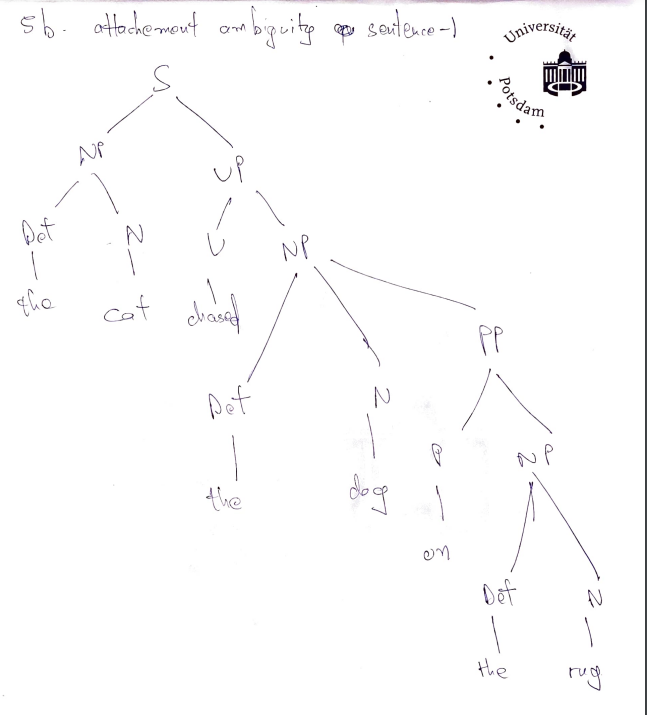

``sentence-1``

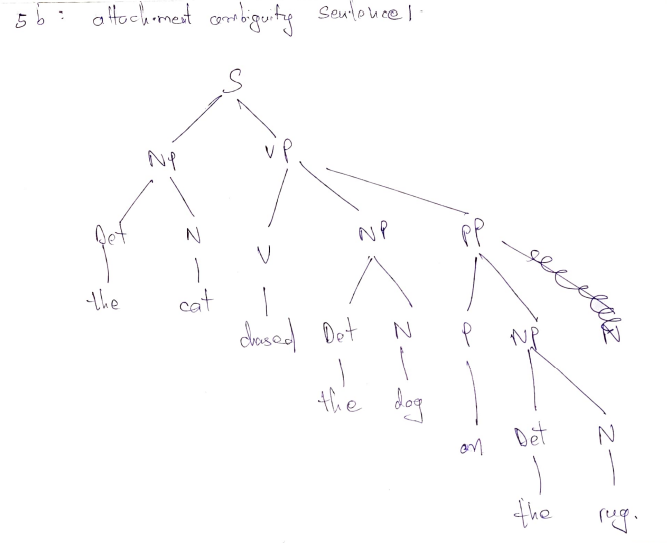

``sentence-2``

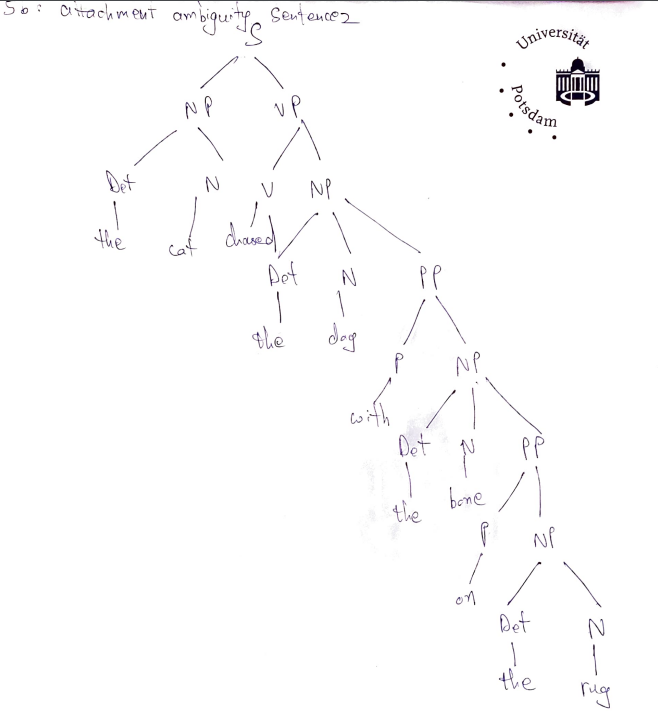

``sentence-2``

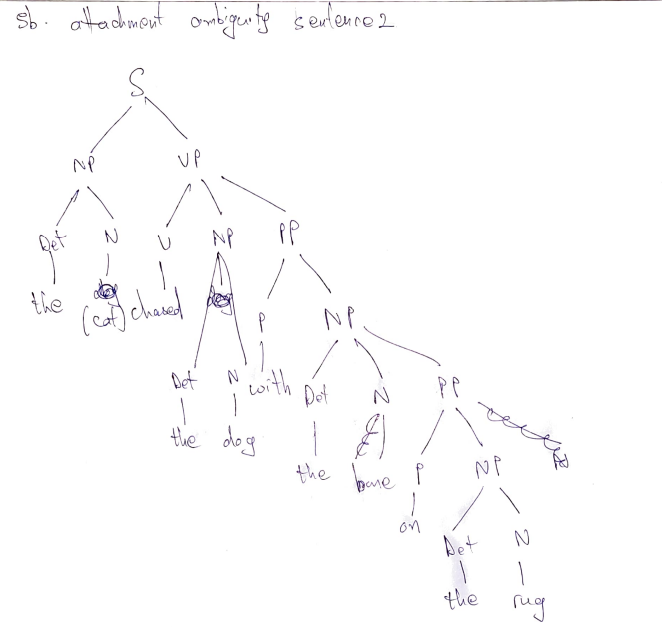

``sentence-2``

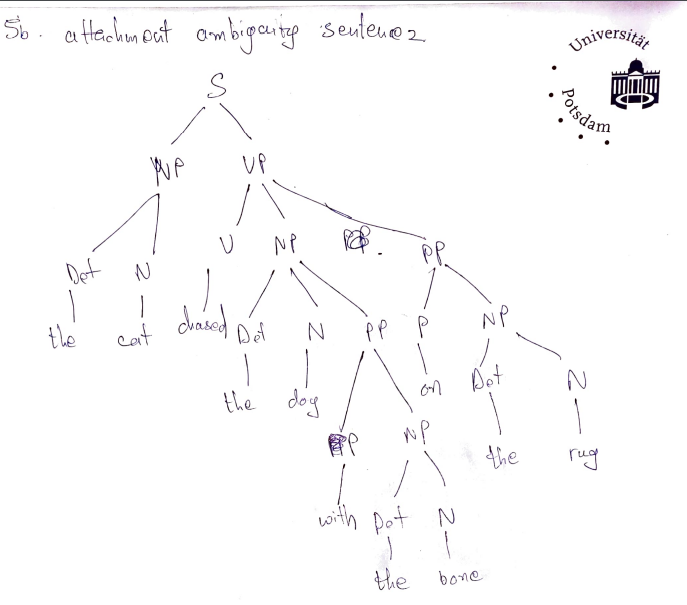